In [ ]:
# Project Description : Twitter US Airline Sentiment

In [1]:
# Import necessary libraries.
import re, string, unicodedata
import pandas as pd
import numpy as np
import nltk  # Natural language processing tool-kit
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
!pip install contractions
import contractions

     |████████████████████████████████| 245kB 4.4MB/s 
     |████████████████████████████████| 317kB 20.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81697 sha256=684189f986d49687d639055571c1d6bf4272e646265c84d78b51c0c9618edd03
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [4]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/'My Drive/Colab Notebooks'
path_of_file ="/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/NLP-Project/Tweets.csv"
path_of_file

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


'/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/NLP-Project/Tweets.csv'

**1. Import the libraries,load dataset,print shape of data and data description**

In [5]:
# Load dataset.
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/NLP-Project/Tweets.csv')
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [6]:
#shape of data
dataset.shape

(14640, 15)

In [7]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

**2. Understanding Data Columns**


*2.a.Drop all othe rcolumns except text and airline sentiment*

In [8]:
data = dataset.drop(
    ['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold','retweet_count','tweet_coord','tweet_coord','tweet_created','tweet_location','user_timezone'], 
    axis=1
)


In [ ]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [13]:
# check for balance
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

*2.b.Check the shape of data*


In [11]:
print(data.shape)

(14640, 2)


2.c.Print first 5 rows of data

In [14]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


**3 Text pre-processing :Data Preparation**

*3.a.html tag removal*

In [15]:
#strip html tags
from bs4 import BeautifulSoup
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [16]:
remove_html_tags=data.copy()
remove_html_tags['text']=remove_html_tags['text'].apply(lambda x: strip_html_tags(x))
remove_html_tags.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [18]:
#replace contractions
remove_contractions=remove_html_tags.copy()
def replace_contractions(text):
    """Replace contractions in string of text - didn't to did not"""
    return contractions.fix(text)

remove_contractions['text'] = remove_html_tags['text'].apply(lambda x: replace_contractions(x))
remove_contractions.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


*3.b. Tokenization*

In [19]:
#tokenization
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
def tokenize(text):
  tokenizer=ToktokTokenizer()
  tokens=tokenizer.tokenize(text)
  return tokens 

In [20]:
tokenize_text=remove_html_tags.copy()
tokenize_text.head()
tokenize_text['text']=remove_html_tags['text'].apply(lambda x: tokenize(x))
tokenize_text[150:1200]

,airline_sentiment,text
150,negative,"[.@VirginAmerica, does, that, mean, you, don, ..."
151,neutral,"[@VirginAmerica, is, there, special, assistanc..."
152,positive,"[@VirginAmerica, thank, you, for, checking, in..."
153,neutral,"[@VirginAmerica, is, your, website, ever, comi..."
154,neutral,"[@VirginAmerica, -, Is, Flight, 713, from, Lov..."
...,...,...
1195,negative,"[@united, i, travelled, from, SCL-, IHA, feb, ..."
1196,negative,"[@united, you, suck., 9, hour, delay, ?, !]"
1197,negative,"[@united, you, are, the, worst, airline, in, t..."
1198,neutral,"[@united, @scotthroth, scott, ,, need, a, good..."


*3.c.remove the numbers*

In [21]:
#remove numbers
import re
def remove_numbers(text, remove_digits=True):
    # pattern = r'[0-9]' if not remove_digits else r'[^0-9]'
    text = re.sub(r'\d+', '', str(text))
    return text

In [22]:
tokenize_text.head()
data_after_no_removed=tokenize_text.copy()
data_after_no_removed['text']=tokenize_text['text'].apply(lambda x: remove_numbers(x,remove_digits=False))
data_after_no_removed[150:1200]


,airline_sentiment,text
150,negative,"['.@VirginAmerica', 'does', 'that', 'mean', 'y..."
151,neutral,"['@VirginAmerica', 'is', 'there', 'special', '..."
152,positive,"['@VirginAmerica', 'thank', 'you', 'for', 'che..."
153,neutral,"['@VirginAmerica', 'is', 'your', 'website', 'e..."
154,neutral,"['@VirginAmerica', '-', 'Is', 'Flight', '', 'f..."
...,...,...
1195,negative,"['@united', 'i', 'travelled', 'from', 'SCL-', ..."
1196,negative,"['@united', 'you', 'suck.', '', 'hour', 'delay..."
1197,negative,"['@united', 'you', 'are', 'the', 'worst', 'air..."
1198,neutral,"['@united', '@scotthroth', 'scott', ',', 'need..."


*3.d.removal of special characters and punctuations*

In [23]:
# remove special characters & punctuations
def remove_special_characters(text,remove_punctuations=False):
  pattern=r'[^\w\s,]' if not remove_punctuations else r'[^\w\s,]'
  text = re.sub(pattern, '', str(text))
  return text

In [24]:
data_after_spl_characters_removed = data_after_no_removed.copy()
data_after_spl_characters_removed['text']=data_after_no_removed['text'].apply(lambda x: remove_special_characters(x, remove_punctuations = False) )
data_after_spl_characters_removed[150:1200]

,airline_sentiment,text
150,negative,"VirginAmerica, does, that, mean, you, don, , t..."
151,neutral,"VirginAmerica, is, there, special, assistance,..."
152,positive,"VirginAmerica, thank, you, for, checking, in, ..."
153,neutral,"VirginAmerica, is, your, website, ever, coming..."
154,neutral,"VirginAmerica, , Is, Flight, , from, Love, Fie..."
...,...,...
1195,negative,"united, i, travelled, from, SCL, IHA, feb, , t..."
1196,negative,"united, you, suck, , hour, delay, ,"
1197,negative,"united, you, are, the, worst, airline, in, the..."
1198,neutral,"united, scotthroth, scott, ,, need, a, good, b..."


*3.e.Lower Casing*

In [25]:
data_lower = data_after_spl_characters_removed.copy()
data_lower.head()
data_lower['text'] = data_after_spl_characters_removed["text"].apply(lambda x: x.lower())
data_lower[150:1200]

,airline_sentiment,text
150,negative,"virginamerica, does, that, mean, you, don, , t..."
151,neutral,"virginamerica, is, there, special, assistance,..."
152,positive,"virginamerica, thank, you, for, checking, in, ..."
153,neutral,"virginamerica, is, your, website, ever, coming..."
154,neutral,"virginamerica, , is, flight, , from, love, fie..."
...,...,...
1195,negative,"united, i, travelled, from, scl, iha, feb, , t..."
1196,negative,"united, you, suck, , hour, delay, ,"
1197,negative,"united, you, are, the, worst, airline, in, the..."
1198,neutral,"united, scotthroth, scott, ,, need, a, good, b..."


In [26]:
data_lower.head()

,airline_sentiment,text
0,neutral,"virginamerica, what, dhepburn, said,"
1,positive,"virginamerica, plus, you, , ve, added, commerc..."
2,neutral,"virginamerica, i, didn, , t, today, , must, me..."
3,negative,"virginamerica, it, , s, really, aggressive, to..."
4,negative,"virginamerica, and, it, , s, a, really, big, b..."


*3.f.Lemmatize or Stemming*

In [ ]:
# does not work
# def lemmatize_verbs(words):
#     """Lemmatize verbs in list of tokenized words"""
#     lemmatizer = WordNetLemmatizer()
#     lemmas = []                           # Create empty list to store pre-processed words.
#     for word in words:
#         lemma = lemmatizer.lemmatize(word,pos='n') # pos = part of speech
#         lemmas.append(lemma)              # Append processed words to new list.
#     return lemmas

In [27]:
import spacy
nlp=spacy.load('en_core_web_sm',parse=True,tag=True,entity=True)
def lemmatize_text(text):
  text=nlp(text)
  text=' '.join(word.lemma_ if word.lemma_!='-PRON-' else word.text for word in text)
  return text


In [28]:
lemmatize_data = data_lower.copy()
lemmatize_data['text'] = data_lower['text'].apply(lambda x: lemmatize_text(x) )
lemmatize_data[150:1200]



,airline_sentiment,text
150,negative,"virginamerica , do , that , mean , you , don ,..."
151,neutral,"virginamerica , be , there , special , assista..."
152,positive,"virginamerica , thank , you , for , check , in..."
153,neutral,"virginamerica , be , your , website , ever , c..."
154,neutral,"virginamerica , , be , flight , , from , love ..."
...,...,...
1195,negative,"united , i , travel , from , scl , iha , feb ,..."
1196,negative,"united , you , suck , , hour , delay , ,"
1197,negative,"united , you , be , the , bad , airline , in ,..."
1198,neutral,"united , scotthroth , scott , , , need , a , g..."


In [29]:
lemmatize_data.to_csv('/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/NLP-Project/lemmatized_data.csv')
# !cp lemmatized_data.csv "/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/NLP-Project/"

*3.g. Join the words in th elist to convert back to text string in the dataframe*

In [30]:
def remove_comma(words):
  s = words.replace(',', '')
  k=' '.join(s)
  return s

In [31]:
join_text = lemmatize_data.copy()
join_text['text']=lemmatize_data['text'].apply(remove_comma)


*3.h Print first 5 rows of data after pre-processing*


In [32]:
join_text.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you ve add commercial...
2,neutral,virginamerica i didn t today must mean...
3,negative,virginamerica it s really aggressive to ...
4,negative,virginamerica and it s a really big ba...


**4. Vectorization**

*4.a. Use CountVectorizer*

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vectorizer=CountVectorizer(max_features=1000) # create transform
cnt_data_features= cnt_vectorizer.fit_transform(join_text['text'])
cnt_data_features = cnt_data_features.toarray()

In [34]:
cnt_data_features.shape
# labels=data

(14640, 1000)

*4.b. Use Tfidf Vectorizer*

In [35]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_data_features = tfidf_vectorizer.fit_transform(join_text['text'])

tfidf_data_features = tfidf_data_features.toarray()

tfidf_data_features.shape

(14640, 1000)

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

5. Fit and evaluate using both type of vectorization

*5.a. Fit & evaluate using count vectorization*

In [36]:
from sklearn.model_selection import train_test_split
# get labels
labels = join_text['airline_sentiment']
print(labels)

X_train, X_test, y_train, y_test = train_test_split(cnt_data_features, labels, test_size=0.3, random_state=42)

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object


In [37]:
# using random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cnt_forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

cnt_forest = cnt_forest.fit(X_train, y_train)

print(cnt_forest)

print(np.mean(cross_val_score(cnt_forest, cnt_data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7111338797814206


In [38]:
# Predict the result for test data using the model built above.

result = cnt_forest.predict(X_test)
print(result)

['positive' 'negative' 'negative' ... 'negative' 'negative' 'negative']


[[2598  149   67]
 [ 448  367   69]
 [ 248  106  340]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


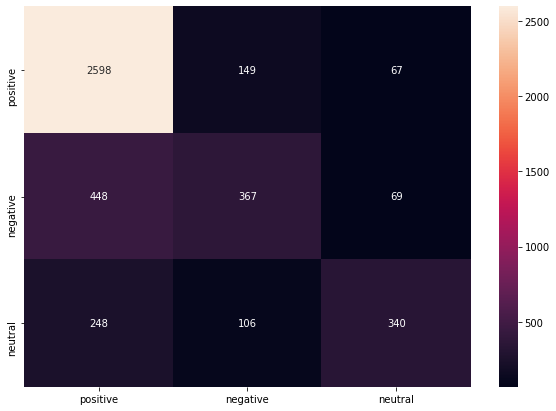

In [39]:
#  Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)
sentiment=['positive','negative','neutral']
df_cm = pd.DataFrame(conf_mat, index = [i for i in sentiment],
                  columns = [i for i in sentiment])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

*5.b. Fit and evaluate using TFIDF Vectorization*

In [40]:
from sklearn.model_selection import train_test_split
# get labels basically a copy from the join_text normalization can be avoided.
labels = join_text['airline_sentiment']
print(labels)
# train test split based on tfidf_features
X_train, X_test, y_train, y_test = train_test_split(tfidf_data_features, labels, test_size=0.3, random_state=42)

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object


In [41]:
# use random forest classifier,  for sophistication and good programming practice ,I could wrap this up as a  function and pass tfidf_features, but just copy pasted it from previosu section and changed relevant variables
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

tfidf_forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

tfidf_forest = tfidf_forest.fit(X_train, y_train)

print(tfidf_forest)

print(np.mean(cross_val_score(tfidf_forest, tfidf_data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7079918032786886


In [42]:
# Predict the result for test data using the model built above.

result = tfidf_forest.predict(X_test)
print(result)

['positive' 'negative' 'negative' ... 'negative' 'negative' 'negative']


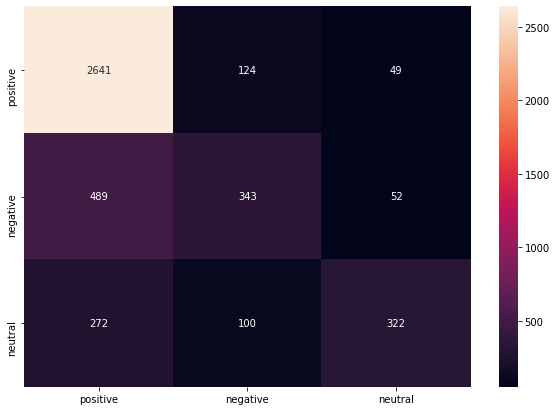

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

sentiment=['positive','negative','neutral']
df_cm = pd.DataFrame(conf_mat, index = [i for i in sentiment],
                  columns = [i for i in sentiment])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

6. Summarize


*   The dataset has reviews in text format and sentiment as text aswell
*   Used various pre-processing techniques - formatted the text by removing html tags if any, tokenized to split by commas, removed numbers, removed contractions such as I'm to I am, didn't to did not etcetra, removed special characters and punctuations, converted to lower case for consistency.


*   Used Lemmatization for efficiency instead of stemming
*   Then joined back to sentecnces by removing commas.


*   Did count as well as TFIDF Vectorization. There are obviously more positive sentiments but I would not say severely unbalanced.And the scores were close enough in both methods.And confusion matrix produced close results too.






